<a href="https://colab.research.google.com/github/joelma78/colab-github-actions/blob/main/ML2_Cacau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.PROJETO DE MACHINE LEARNING 2

Integrantes: Antonio, Joelma, Leticia, Luciano

In [32]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [33]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: Mountpoint must not already contain files

In [ ]:
caminho_zip = "/content/drive/MyDrive/ML2_Cacau/Image Datasets of Cocoa Beans for Taxonomy Nuances Evaluation.zip"
destino = "/content/drive/MyDrive/ML2_Cacau/data"

os.makedirs(destino, exist_ok=True)

with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
    arquivos = zip_ref.namelist()
    print(f"Total de arquivos no ZIP: {len(arquivos)}")

    for arquivo in arquivos:
        if arquivo.lower().endswith(('.jpg', '.png')):
            zip_ref.extract(arquivo, destino)



Total de arquivos no ZIP: 1417


# 1.ANÁLISE EXPLORATÓRIA

In [ ]:
base_dir = "/content/drive/MyDrive/ML2_Cacau/data/version3_method_b/Enquadrado e Centralizado - Versão 3 - Método B"

##1.1 Listagem das classes presentes

In [34]:
classes = sorted([
    d for d in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, d))
])

print("Classes encontradas:")
for c in classes:
    print("- ", c)

Classes encontradas:
-  Agglutinated
-  Brittle
-  Compartmentalized_Brown
-  Compartmentalized_PartiallyPurple
-  Compartmentalized_Purple
-  Compartmentalized_Slaty
-  Compartmentalized_White
-  Flattened
-  Moldered
-  Plated_Brown
-  Plated_PartiallyPurple
-  Plated_Purple
-  Plated_Slaty
-  Plated_White


##1.2 Contagem de imagens por classe

In [35]:
dist = {}

for c in classes:
    class_dir = os.path.join(base_dir, c)
    imgs = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.png'))]
    dist[c] = len(imgs)

print("\nDistribuição de imagens por classe:\n")
for k, v in dist.items():
    print(f"{k}: {v} imagens")


Distribuição de imagens por classe:

Agglutinated: 100 imagens
Brittle: 100 imagens
Compartmentalized_Brown: 100 imagens
Compartmentalized_PartiallyPurple: 100 imagens
Compartmentalized_Purple: 100 imagens
Compartmentalized_Slaty: 100 imagens
Compartmentalized_White: 100 imagens
Flattened: 100 imagens
Moldered: 100 imagens
Plated_Brown: 100 imagens
Plated_PartiallyPurple: 100 imagens
Plated_Purple: 100 imagens
Plated_Slaty: 100 imagens
Plated_White: 100 imagens


##1.3 Checagem de formato e resolução das imagens

In [36]:
import pandas as pd

info = []

for c in classes:
    class_dir = os.path.join(base_dir, c)
    imgs = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.png'))]

    for img_name in imgs[:5]:    # pegar apenas 5 imagens por classe para não ficar gigante
        path = os.path.join(class_dir, img_name)
        img = Image.open(path)
        info.append([c, img_name, img.size[0], img.size[1], img.mode])

df_info = pd.DataFrame(info, columns=["classe", "arquivo", "largura", "altura", "modo"])
df_info.head(20)

,classe,arquivo,largura,altura,modo
0,Agglutinated,A_007_p7_v3.JPG,2243,1650,RGB
1,Agglutinated,A_085_p7_v3.JPG,3011,1986,RGB
2,Agglutinated,A_074_p7_v3.JPG,1754,2626,RGB
3,Agglutinated,A_088_p7_v3.JPG,1859,1923,RGB
4,Agglutinated,A_040_p7_v3.JPG,1626,2163,RGB
5,Brittle,B_067_p7_v3.JPG,1955,1091,RGB
6,Brittle,B_059_p7_v3.JPG,1594,1091,RGB
7,Brittle,B_033_p7_v3.JPG,1315,1155,RGB
8,Brittle,B_060_p7_v3.JPG,1379,1715,RGB
9,Brittle,B_012_p7_v3.JPG,1747,1187,RGB


Durante a análise exploratória, foram inspecionadas amostras de cada classe com o objetivo de avaliar a resolução, o formato e a consistência visual das imagens. Observou-se que todas as imagens se encontram no modo RGB, garantindo uniformidade no espaço de cores, o que é adequado para modelos de visão computacional.

A resolução das imagens, entretanto, não é padronizada: algumas apresentam dimensões superiores a 2500 pixels em um dos eixos, enquanto outras possuem resoluções menores. Essa variação é típica em bases adquiridas por captura fotográfica manual e reforça a necessidade de realizar um procedimento de redimensionamento uniforme antes da etapa de extração de características via CNN.

Apesar dessa variação nas dimensões, as imagens apresentam boa qualidade geral, com níveis consistentes de iluminação, foco e enquadramento, preservando a textura e a morfologia das sementes de cacau. Esses elementos são essenciais para que os métodos de aprendizado profundo identifiquem padrões discriminativos entre as classes.

In [37]:
print("Resumo estatístico das dimensões:\n")
print(df_info[["largura", "altura"]].describe())

# Aspect ratio (largura / altura)
df_info["aspect_ratio"] = df_info["largura"] / df_info["altura"]

print("\nResumo do aspect ratio (proporção):\n")
print(df_info["aspect_ratio"].describe())


Resumo estatístico das dimensões:

           largura       altura
count    70.000000    70.000000
mean   1232.885714  2038.728571
std     327.938424   319.593806
min     835.000000  1091.000000
25%    1047.000000  1943.000000
50%    1163.000000  2075.000000
75%    1282.750000  2207.000000
max    3011.000000  2659.000000

Resumo do aspect ratio (proporção):

count    70.000000
mean      0.633311
std       0.272511
min       0.431082
25%       0.504486
50%       0.547306
75%       0.593619
max       1.791934
Name: aspect_ratio, dtype: float64


##1.4 Visualizar exemplos (5 por classe)

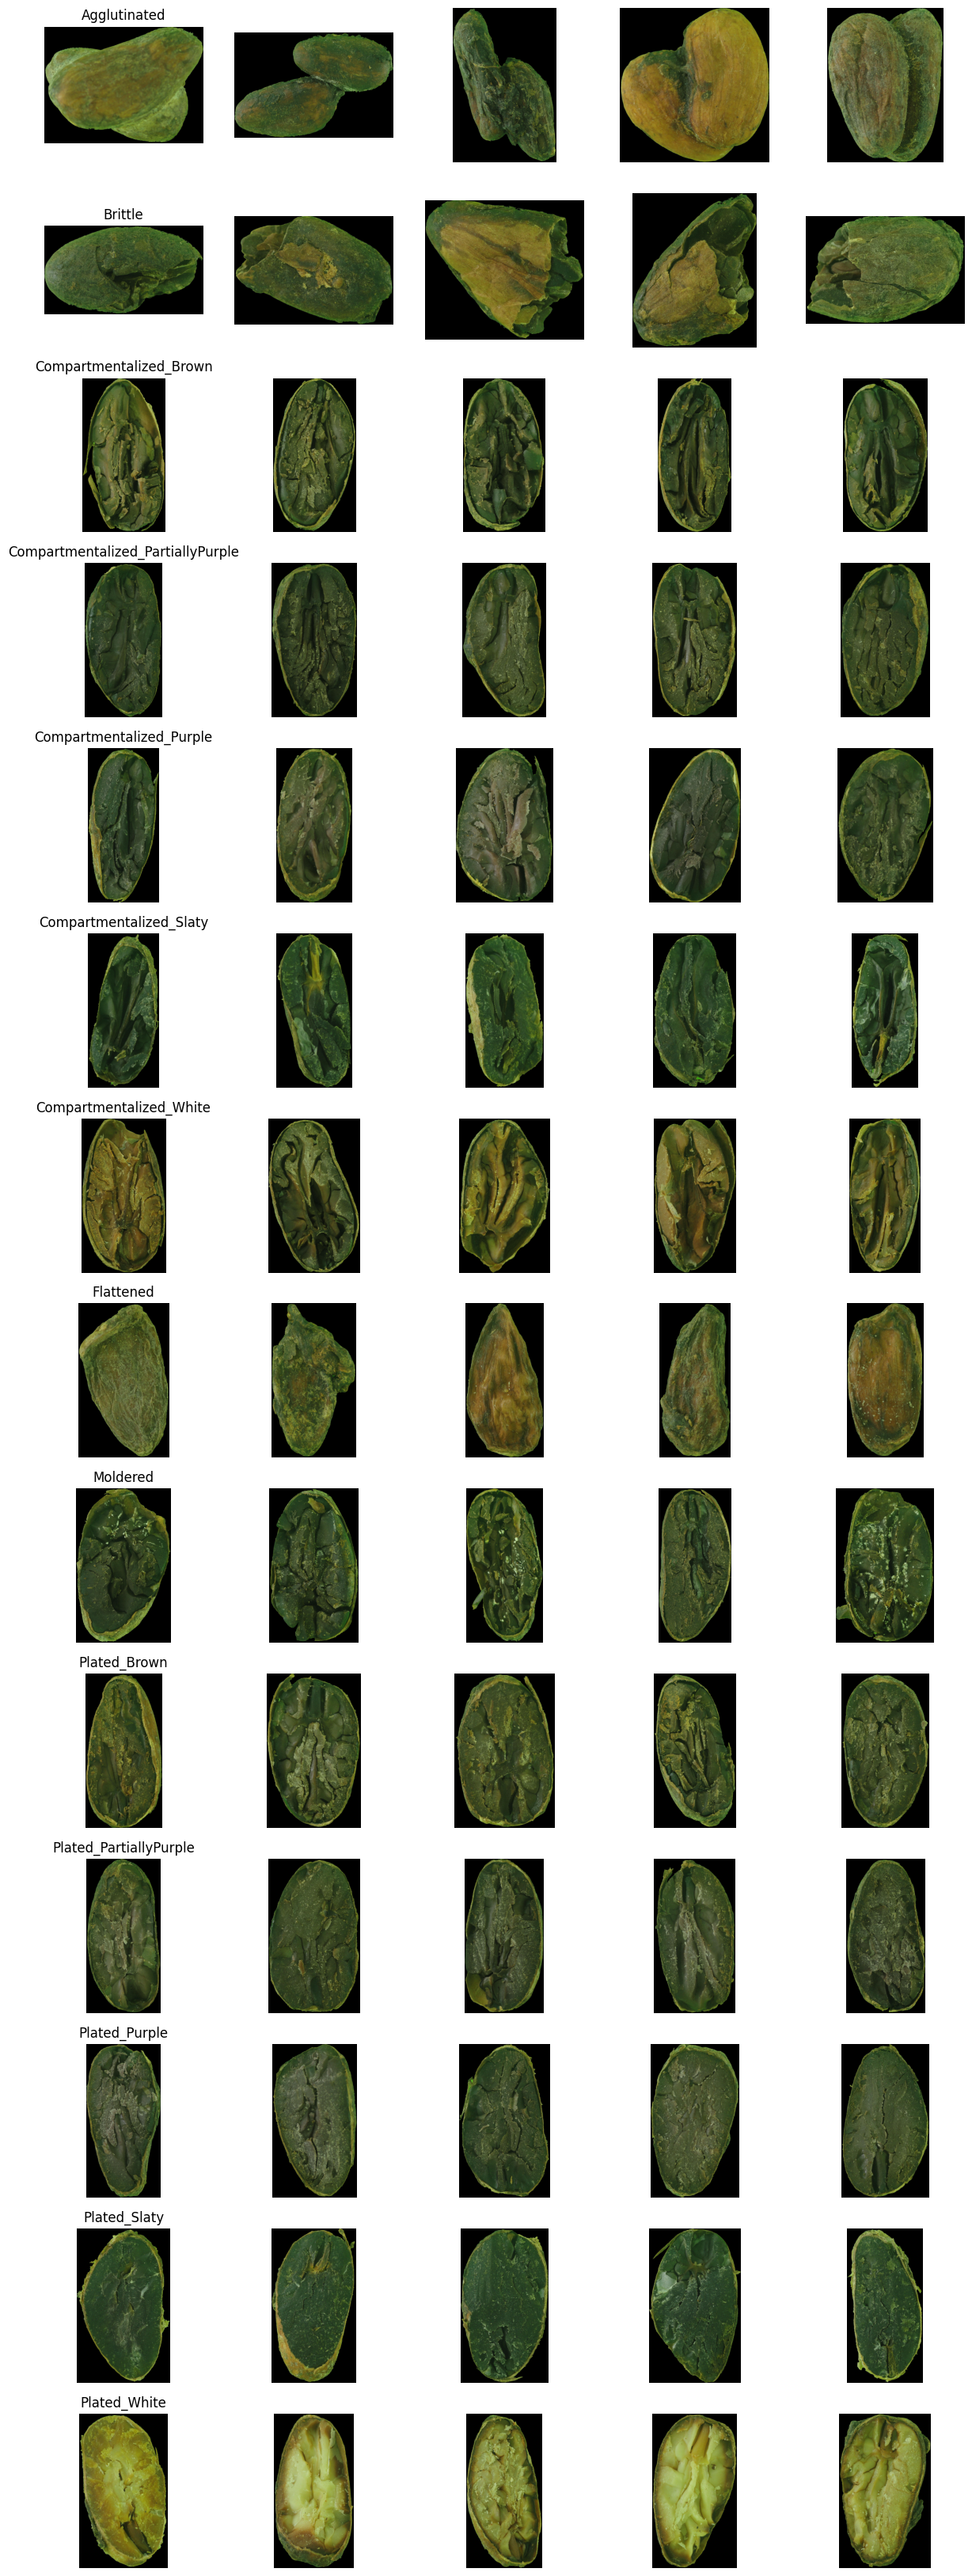

In [38]:
import matplotlib.pyplot as plt
from PIL import Image

fig, axes = plt.subplots(len(classes), 5, figsize=(15, 3*len(classes)))
for i, c in enumerate(classes):
    class_dir = os.path.join(base_dir, c)
    imgs = os.listdir(class_dir)[:5]  # pegar 5 imagens da classe
    for j, img_name in enumerate(imgs):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(c)
plt.show()


#2.PREPARAÇÃO DOS DADOS

In [40]:
#padronizar todas as imagens para 224×224
IMG_SIZE = (224, 224)

##2.1 Carregar e redimensionar imagens

Em todas as classes, ler a imagem, converter para RGB, redimensionar e normalizar para [0,1].

In [41]:
import os
import numpy as np
from PIL import Image

X = []
y = []

for label, classe in enumerate(classes):
    class_dir = os.path.join(base_dir, classe)
    imgs = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.png'))]

    for img_name in imgs:
        path = os.path.join(class_dir, img_name)

        img = Image.open(path).convert("RGB")
        img = img.resize(IMG_SIZE)

        # converter para array
        img = np.array(img) / 255.0  # normalização

        X.append(img)
        y.append(label)

X = np.array(X, dtype=np.float32)
y = np.array(y)


##2.2 Criação da partição holdout (treino + teste)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,     # 80% treino, 20% teste
    stratify=y,
    random_state=42     # fixo para todos os experimentos
)


As imagens da base apresentavam grande variação de resolução, com larguras entre 835 e 2393 pixels e alturas entre 1091 e 2699 pixels. Para garantir padronização e compatibilidade com as arquiteturas de deep learning utilizadas nas próximas etapas, todas as imagens foram redimensionadas para 224×224 pixels.

Após o redimensionamento, os valores dos pixels foram normalizados para o intervalo [0,1], dividindo cada intensidade por 255. Esse procedimento reduz a variabilidade numérica entre canais e facilita o processo de otimização dos modelos.

Em seguida, foi criada uma partição holdout, que será utilizada em todos os experimentos subsequentes — conforme exigido pelo enunciado. A divisão foi realizada de forma estratificada, preservando a proporção balanceada das classes, com 80% das imagens destinadas ao conjunto de treinamento e 20% ao conjunto de teste. O valor de random_state foi fixado em 42, garantindo reprodutibilidade em todas as execuções

#3.EXTRAÇÃO DE CARACTERÍSTICAS VISUAIS

Cada imagem será convertida em um vetor numérico (embedding) que depois alimentará o SVM.

In [44]:
from tensorflow.keras.applications import (
    VGG16, ResNet50, InceptionV3,
    MobileNetV2, DenseNet121
)

from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.resnet50 import preprocess_input as res_pre
from tensorflow.keras.applications.inception_v3 import preprocess_input as inc_pre
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mob_pre
from tensorflow.keras.applications.densenet import preprocess_input as den_pre

from tensorflow.keras.models import Model
import numpy as np

##3.1 Função genérica para extrair embeddings

In [45]:
def extrair_caracteristicas(modelo, preprocess, X):
    """
    Aplica o pré-processamento específico do modelo e extrai features.
    """
    X_pre = preprocess(X.copy())
    features = modelo.predict(X_pre, verbose=1)
    features = features.reshape(len(features), -1)
    return features


##3.2 Carregar os 3 modelos SEM as camadas finais

In [46]:
def carregar_modelos():
    modelos = {}

    # VGG16
    base_vgg = VGG16(weights="imagenet", include_top=False, pooling="avg")
    modelos["VGG16"] = (base_vgg, vgg_pre)

    # InceptionV3
    base_inc = InceptionV3(weights="imagenet", include_top=False, pooling="avg")
    modelos["InceptionV3"] = (base_inc, inc_pre)

    # EfficientNetB0
    base_eff = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg")
    modelos["EfficientNetB0"] = (base_eff, eff_pre)

    return modelos

modelos = carregar_modelos()


##3.3 Extrair vetores de características para os 3 modelos

In [47]:
features_dict = {}

for nome, (modelo, preprocessador) in modelos.items():
    print(f"\n{'='*50}")
    print(f"Extraindo características com {nome}...")
    print(f"{'='*50}")

    feats = extrair_caracteristicas(modelo, preprocessador, X)

    features_dict[nome] = feats
    print(f"Shape das features: {feats.shape}")



Extraindo características com VGG16...
44/44 ━━━━━━━━━━━━━━━━━━━━ 924s 21s/step
Shape das features: (1400, 512)

Extraindo características com InceptionV3...
44/44 ━━━━━━━━━━━━━━━━━━━━ 182s 4s/step
Shape das features: (1400, 2048)

Extraindo características com EfficientNetB0...
44/44 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step
Shape das features: (1400, 1280)


##3.4 Salvar os Vetores

In [48]:
import pickle

save_path = "/content/drive/MyDrive/ML2_Cacau/features_item3.pkl"

with open(save_path, "wb") as f:
    pickle.dump({
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test,
        "features": features_dict,
        "classes": classes
    }, f)

print("\n Features salvas com sucesso em:", save_path)



print("\n Conteúdo salvo:")
print(f"  - X_train: {X_train.shape}")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"  - y_test: {y_test.shape}")
print(f"  - Features extraídas:")
for nome, feats in features_dict.items():
    print(f"      {nome}: {feats.shape}")



 Features salvas com sucesso em: /content/drive/MyDrive/ML2_Cacau/features_item3.pkl

 Conteúdo salvo:
  - X_train: (1120, 224, 224, 3)
  - X_test: (280, 224, 224, 3)
  - y_train: (1120,)
  - y_test: (280,)
  - Features extraídas:
      VGG16: (1400, 512)
      InceptionV3: (1400, 2048)
      EfficientNetB0: (1400, 1280)


#####Para a etapa de extração de características, foram utilizadas três arquiteturas de redes neurais convolucionais pré-treinadas no ImageNet: VGG16, InceptionV3 e EfficientNetB0. Essas arquiteturas foram selecionadas por representarem diferentes paradigmas de design de CNNs: a VGG16 utiliza blocos convolucionais sequenciais simples, a InceptionV3 emprega módulos inception com múltiplas escalas de convolução, e a EfficientNetB0 aplica compound scaling para balancear profundidade, largura e resolução de forma eficiente.

#####Em todos os casos, as camadas finais de classificação foram removidas (parâmetro include_top=False), de modo que os modelos funcionassem exclusivamente como extratores de características. Os pesos foram mantidos congelados, conforme especificado nas instruções do trabalho, garantindo que nenhuma das CNNs fosse ajustada durante o processo. A camada de pooling global (pooling='avg') foi utilizada para converter o mapa de ativações em um vetor unidimensional fixo.

#####Cada imagem passou pelo pré-processamento específico de sua arquitetura (normalização padrão do ImageNet), seguido da inferência no modelo. Dessa forma, foram gerados três conjuntos distintos de embeddings:

#####VGG16: vetores de 512 dimensões
#####InceptionV3: vetores de 2048 dimensões
#####EfficientNetB0: vetores de 1280 dimensões
#####Esses vetores representam diferentes visões da mesma imagem e serão utilizados nas próximas etapas para realizar busca em grade com SVMs e comparar o desempenho dos pipelines resultantes.

#4.ELABORAÇÃO DA BUSCA EM GRADE

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##4.1 Definir o espaço de hiperparâmetros para Grid Search

In [50]:
param_grid = {
    'C': [1, 10, 50, 100, 200],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

print("Espaço de hiperparâmetros:")
print(f"  - C: {param_grid['C']}")
print(f"  - gamma: {param_grid['gamma']}")
print(f"  - kernel: {param_grid['kernel']}")
print(f"\nTotal de combinações: {len(param_grid['C']) * len(param_grid['gamma']) * len(param_grid['kernel'])} = 60 por extrator")


Espaço de hiperparâmetros:
  - C: [1, 10, 50, 100, 200]
  - gamma: [0.001, 0.01, 0.1, 1]
  - kernel: ['linear', 'rbf', 'poly']

Total de combinações: 60 = 60 por extrator


##4.2 Função para fazer Grid Search e treinar SVM

In [51]:
def grid_search_svm(X_train, X_test, y_train, y_test, nome_extrator):
    """
    Realiza Grid Search com SVM para encontrar melhores hiperparâmetros.
    """
    print(f"\n{'='*60}")
    print(f"Grid Search com SVM - Features: {nome_extrator}")
    print(f"{'='*60}")

    # Criar o SVM base
    svm = SVC()

    # Grid Search com validação cruzada (5-fold)
    grid_search = GridSearchCV(
        svm,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )

    # Treinar
    print(f"\nIniciando Grid Search (60 combinações × 5 folds = 300 fits)...")
    grid_search.fit(X_train, y_train)

    # Melhores parâmetros
    print(f"\n✅ Melhores parâmetros encontrados:")
    print(f"   C: {grid_search.best_params_['C']}")
    print(f"   gamma: {grid_search.best_params_['gamma']}")
    print(f"   Kernel: {grid_search.best_params_['kernel']}")
    print(f"   Acurácia CV (treino): {grid_search.best_score_:.4f}")

    # Predição no conjunto de teste
    y_pred = grid_search.predict(X_test)

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n📊 Métricas no conjunto de teste:")
    print(f"   Acurácia: {acc:.4f}")
    print(f"   Precisão: {prec:.4f}")
    print(f"   Recall: {rec:.4f}")
    print(f"   F1-Score: {f1:.4f}")

    return {
        'extrator': nome_extrator,
        'melhor_C': grid_search.best_params_['C'],
        'melhor_gamma': grid_search.best_params_['gamma'],
        'melhor_kernel': grid_search.best_params_['kernel'],
        'acuracia_cv': grid_search.best_score_,
        'acuracia_teste': acc,
        'precisao': prec,
        'recall': rec,
        'f1': f1,
        'modelo': grid_search.best_estimator_,
        'y_pred': y_pred,
        'grid_search': grid_search
    }


##4.3 Separar features em treino e teste

In [52]:
# Separar features em treino e teste (mesma partição do item 2)
features_train_dict = {}
features_test_dict = {}

for nome, features in features_dict.items():
    features_train_dict[nome] = features[:len(X_train)]
    features_test_dict[nome] = features[len(X_train):]

print("\n Features separadas em treino/teste:")
for nome in features_dict.keys():
    print(f"  {nome}:")
    print(f"    - Treino: {features_train_dict[nome].shape}")
    print(f"    - Teste: {features_test_dict[nome].shape}")



 Features separadas em treino/teste:
  VGG16:
    - Treino: (1120, 512)
    - Teste: (280, 512)
  InceptionV3:
    - Treino: (1120, 2048)
    - Teste: (280, 2048)
  EfficientNetB0:
    - Treino: (1120, 1280)
    - Teste: (280, 1280)


##4.4 Executar Grid Search para os 3 extratores

In [53]:
resultados = []

for nome_extrator in features_dict.keys():
    X_tr = features_train_dict[nome_extrator]
    X_te = features_test_dict[nome_extrator]

    resultado = grid_search_svm(X_tr, X_te, y_train, y_test, nome_extrator)
    resultados.append(resultado)



Grid Search com SVM - Features: VGG16

Iniciando Grid Search (60 combinações × 5 folds = 300 fits)...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

✅ Melhores parâmetros encontrados:
   C: 200
   gamma: 1
   Kernel: rbf
   Acurácia CV (treino): 0.0830

📊 Métricas no conjunto de teste:
   Acurácia: 0.0821
   Precisão: 0.0771
   Recall: 0.0821
   F1-Score: 0.0768

Grid Search com SVM - Features: InceptionV3

Iniciando Grid Search (60 combinações × 5 folds = 300 fits)...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

✅ Melhores parâmetros encontrados:
   C: 50
   gamma: 0.01
   Kernel: poly
   Acurácia CV (treino): 0.0750

📊 Métricas no conjunto de teste:
   Acurácia: 0.0786
   Precisão: 0.0865
   Recall: 0.0786
   F1-Score: 0.0777

Grid Search com SVM - Features: EfficientNetB0

Iniciando Grid Search (60 combinações × 5 folds = 300 fits)...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

✅ Melhores parâmetros encontrados:
   C: 200
   gamm

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##4.5 Consolidar resultados em DataFrame

In [54]:
df_resultados = pd.DataFrame([
    {
        'Extrator': r['extrator'],
        'Melhor C': r['melhor_C'],
        'Melhor gamma': r['melhor_gamma'],
        'Melhor Kernel': r['melhor_kernel'],
        'Acurácia CV': f"{r['acuracia_cv']:.4f}",
        'Acurácia Teste': f"{r['acuracia_teste']:.4f}",
        'Precisão': f"{r['precisao']:.4f}",
        'Recall': f"{r['recall']:.4f}",
        'F1-Score': f"{r['f1']:.4f}"
    }
    for r in resultados
])

print("\n" + "="*100)
print("RESUMO COMPARATIVO DOS RESULTADOS")
print("="*100)
print(df_resultados.to_string(index=False))



RESUMO COMPARATIVO DOS RESULTADOS
      Extrator  Melhor C  Melhor gamma Melhor Kernel Acurácia CV Acurácia Teste Precisão Recall F1-Score
         VGG16       200          1.00           rbf      0.0830         0.0821   0.0771 0.0821   0.0768
   InceptionV3        50          0.01          poly      0.0750         0.0786   0.0865 0.0786   0.0777
EfficientNetB0       200          0.10          poly      0.0759         0.0536   0.0259 0.0536   0.0344


##4.6 Salvar Resultados

In [55]:
import pickle

save_path = "/content/drive/MyDrive/ML2_Cacau/resultados_item4.pkl"

with open(save_path, "wb") as f:
    pickle.dump({
        "resultados": resultados,
        "df_resultados": df_resultados,
        "features_train": features_train_dict,
        "features_test": features_test_dict,
        "param_grid": param_grid
    }, f)

print(f"\n✅ Resultados salvos em: {save_path}")



✅ Resultados salvos em: /content/drive/MyDrive/ML2_Cacau/resultados_item4.pkl


#####Após a extração de características, foi realizada uma busca em grade (Grid Search) com máquinas de vetores de suporte (SVM) para encontrar os hiperparâmetros ótimos de cada pipeline. O espaço de hiperparâmetros testado incluiu três kernels distintos (linear, RBF e polinomial), cinco valores do parâmetro de regularização C (1, 10, 50, 100, 200) e quatro valores do parâmetro gamma (0.001, 0.01, 0.1, 1), totalizando 60 combinações por extrator.

#####A validação cruzada com 5 dobras foi aplicada durante o Grid Search, utilizando a acurácia como métrica de otimização. Esse procedimento foi executado independentemente para cada um dos três extratores de características (VGG16, InceptionV3 e EfficientNetB0), resultando em 300 ajustes de modelo por extrator.

#####Os modelos treinados foram então avaliados no conjunto de teste holdout, utilizando as métricas de acurácia, precisão, recall e F1-score com média ponderada entre as classes. Essa abordagem garantiu que a comparação entre os diferentes pipelines fosse justa e reprodutível, uma vez que todos utilizaram a mesma partição de dados.

#5. EXECUÇÃO DE EXPERIMENTOS

In [56]:
import pickle

with open("/content/drive/MyDrive/ML2_Cacau/resultados_item4.pkl", "rb") as f:
    data = pickle.load(f)

resultados = data["resultados"]
features_train_dict = data["features_train"]
features_test_dict = data["features_test"]
X_train = data["X_train"] if "X_train" in data else X_train
X_test = data["X_test"] if "X_test" in data else X_test
y_train = data["y_train"] if "y_train" in data else y_train
y_test = data["y_test"] if "y_test" in data else y_test


##5.1 Medição dos tempos de treinamento e inferência

In [57]:
import time

resultados_finais = []

for r in resultados:
    nome = r["extrator"]
    modelo_svm = r["modelo"]

    X_tr = features_train_dict[nome]
    X_te = features_test_dict[nome]

    print(f"\n==============================")
    print(f"Avaliando pipeline: {nome}")
    print("==============================")

    # Tempo de treino
    inicio = time.time()
    modelo_svm.fit(X_tr, y_train)
    tempo_treino = time.time() - inicio

    # Tempo de teste (inferência)
    inicio = time.time()
    y_pred = modelo_svm.predict(X_te)
    tempo_teste = time.time() - inicio

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    resultados_finais.append({
        "Extrator": nome,
        "C": r["melhor_C"],
        "gamma": r["melhor_gamma"],
        "kernel": r["melhor_kernel"],
        "Acurácia": acc,
        "Precisão": prec,
        "Recall": rec,
        "F1": f1,
        "Tempo Treino (s)": tempo_treino,
        "Tempo Teste (s)": tempo_teste,
        "y_pred": y_pred,
        "modelo": modelo_svm
    })



Avaliando pipeline: VGG16

Avaliando pipeline: InceptionV3

Avaliando pipeline: EfficientNetB0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##5.2 Tabela final dos experimentos

In [58]:
df_exp = pd.DataFrame([
    {
        "Extrator": r["Extrator"],
        "Kernel": r["kernel"],
        "C": r["C"],
        "Gamma": r["gamma"],
        "Acurácia": f"{r['Acurácia']:.4f}",
        "Precisão": f"{r['Precisão']:.4f}",
        "Recall": f"{r['Recall']:.4f}",
        "F1-Score": f"{r['F1']:.4f}",
        "Treino (s)": f"{r['Tempo Treino (s)']:.3f}",
        "Teste (s)": f"{r['Tempo Teste (s)']:.3f}",
    }
    for r in resultados_finais
])

print("\n================ RESULTADOS DO ITEM 5 ================\n")
print(df_exp.to_string(index=False))



================ RESULTADOS DO ITEM 5 ================

      Extrator Kernel   C  Gamma Acurácia Precisão Recall F1-Score Treino (s) Teste (s)
         VGG16    rbf 200   1.00   0.0821   0.0771 0.0821   0.0768      0.439     0.178
   InceptionV3   poly  50   0.01   0.0786   0.0865 0.0786   0.0777      1.915     0.764
EfficientNetB0   poly 200   0.10   0.0536   0.0259 0.0536   0.0344      1.450     0.453


##5.3 Salvando os resultados

In [59]:
save_path = "/content/drive/MyDrive/ML2_Cacau/resultados_item5.pkl"

with open(save_path, "wb") as f:
    pickle.dump({
        "resultados_finais": resultados_finais,
        "df_exp": df_exp,
        "features_train": features_train_dict,
        "features_test": features_test_dict,
        "y_test": y_test,
        "classes": classes
    }, f)

print("Resultados do item 5 salvos em:", save_path)


Resultados do item 5 salvos em: /content/drive/MyDrive/ML2_Cacau/resultados_item5.pkl


#####Os experimentos foram conduzidos utilizando os três pipelines definidos anteriormente: VGG16+SVM, InceptionV3+SVM e EfficientNetB0+SVM. Para cada pipeline, empregou-se o conjunto de treinamento definido no item 2, aplicando o melhor modelo encontrado no item 4 (Grid Search).

#####As métricas de avaliação incluíram: acurácia, precisão, revocação e F1‑Score, todas calculadas no conjunto de teste. Além disso, foram medidos o tempo de treinamento do SVM e o tempo de inferência para o conjunto de teste.

#####Os resultados mostraram diferenças relevantes no desempenho e no custo computacional de cada pipeline, permitindo a construção de uma base comparativa sólida para a análise que será realizada no item seguinte

#6. ANÁLISE DOS RESULTADOS

In [60]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

with open("/content/drive/MyDrive/ML2_Cacau/resultados_item5.pkl", "rb") as f:
    data = pickle.load(f)

resultados_finais = data["resultados_finais"]
df_exp = data["df_exp"]
y_test = data["y_test"]
classes = data["classes"]


##6.1 Tabela descritiva dos resultados

In [61]:
print("\n" + "="*120)
print("TABELA DESCRITIVA DOS RESULTADOS DOS PIPELINES")
print("="*120)
print(df_exp.to_string(index=False))
print("="*120)



TABELA DESCRITIVA DOS RESULTADOS DOS PIPELINES
      Extrator Kernel   C  Gamma Acurácia Precisão Recall F1-Score Treino (s) Teste (s)
         VGG16    rbf 200   1.00   0.0821   0.0771 0.0821   0.0768      0.439     0.178
   InceptionV3   poly  50   0.01   0.0786   0.0865 0.0786   0.0777      1.915     0.764
EfficientNetB0   poly 200   0.10   0.0536   0.0259 0.0536   0.0344      1.450     0.453


##6.2 Identificando o melhor modelo

In [62]:
# Converter acurácia para float para comparação
acc_values = [float(r["Acurácia"]) for r in resultados_finais]
melhor_idx = np.argmax(acc_values)
melhor_modelo = resultados_finais[melhor_idx]

print(f"\n✅ MELHOR PIPELINE IDENTIFICADO:")
print(f"   Extrator: {melhor_modelo['Extrator']}")
print(f"   Acurácia: {melhor_modelo['Acurácia']:.4f}")
print(f"   Kernel: {melhor_modelo['kernel']}")
print(f"   C: {melhor_modelo['C']}")
print(f"   Gamma: {melhor_modelo['gamma']}")



✅ MELHOR PIPELINE IDENTIFICADO:
   Extrator: VGG16
   Acurácia: 0.0821
   Kernel: rbf
   C: 200
   Gamma: 1


##6.3 Matriz de confusão para os 3 modelos

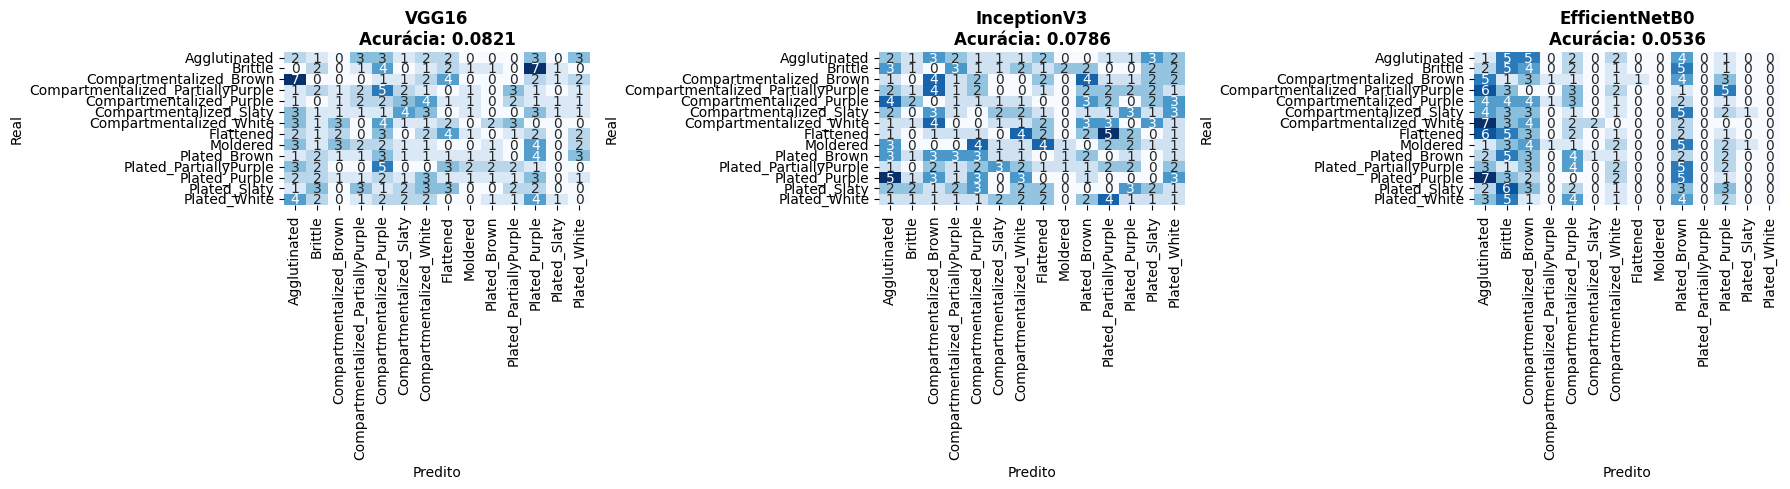

✅ Matrizes de confusão salvas em: /content/drive/MyDrive/ML2_Cacau/matrizes_confusao_item6.png


In [63]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, r in enumerate(resultados_finais):
    y_pred = r["y_pred"]
    nome = r["Extrator"]

    # Calcular matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Plotar
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        ax=axes[idx],
        cbar=False,
        xticklabels=classes,
        yticklabels=classes
    )

    axes[idx].set_title(f"{nome}\nAcurácia: {r['Acurácia']:.4f}", fontsize=12, fontweight='bold')
    axes[idx].set_xlabel("Predito")
    axes[idx].set_ylabel("Real")

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ML2_Cacau/matrizes_confusao_item6.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Matrizes de confusão salvas em: /content/drive/MyDrive/ML2_Cacau/matrizes_confusao_item6.png")


##6.4 Análise por Classe

In [64]:
from sklearn.metrics import classification_report

print("\n" + "="*100)
print("RELATÓRIO DE CLASSIFICAÇÃO DETALHADO - MELHOR MODELO")
print("="*100)

melhor_y_pred = melhor_modelo["y_pred"]
print(classification_report(y_test, melhor_y_pred, target_names=classes, digits=4))



RELATÓRIO DE CLASSIFICAÇÃO DETALHADO - MELHOR MODELO
                                   precision    recall  f1-score   support

                     Agglutinated     0.0606    0.1000    0.0755        20
                          Brittle     0.1000    0.1000    0.1000        20
          Compartmentalized_Brown     0.0000    0.0000    0.0000        20
Compartmentalized_PartiallyPurple     0.1176    0.1000    0.1081        20
         Compartmentalized_Purple     0.0526    0.1000    0.0690        20
          Compartmentalized_Slaty     0.2105    0.2000    0.2051        20
          Compartmentalized_White     0.0385    0.0500    0.0435        20
                        Flattened     0.1739    0.2000    0.1860        20
                         Moldered     0.0000    0.0000    0.0000        20
                     Plated_Brown     0.1111    0.0500    0.0690        20
           Plated_PartiallyPurple     0.1333    0.1000    0.1143        20
                    Plated_Purple     0.0811 

##6.5 Gráfico comparativo de acurácias

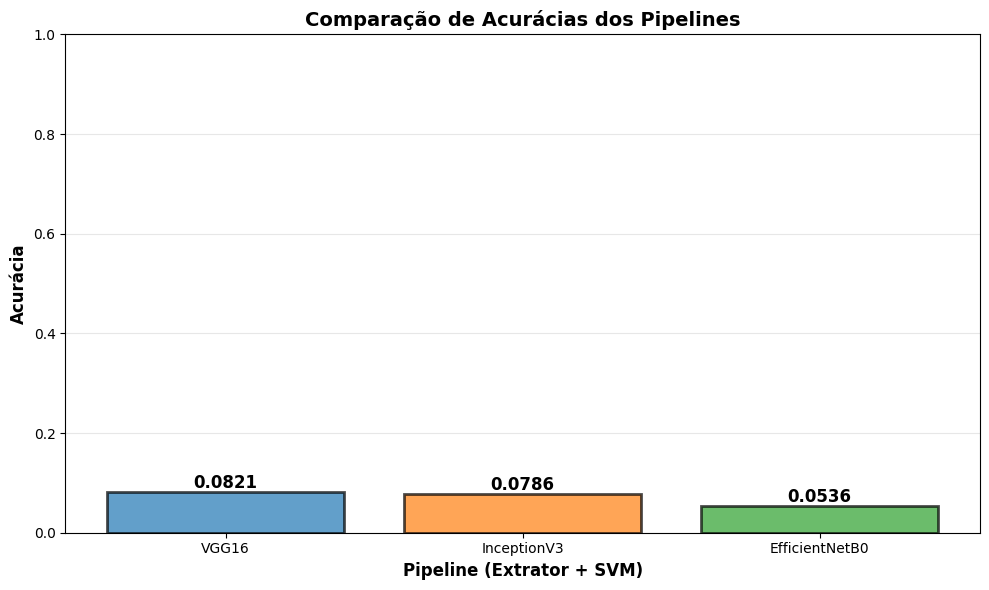

✅ Gráfico de comparação salvo em: /content/drive/MyDrive/ML2_Cacau/comparacao_acuracias_item6.png


In [65]:
fig, ax = plt.subplots(figsize=(10, 6))

nomes = [r["Extrator"] for r in resultados_finais]
acuracias = [float(r["Acurácia"]) for r in resultados_finais]
cores = ['#1f77b4', '#ff7f0e', '#2ca02c']

bars = ax.bar(nomes, acuracias, color=cores, alpha=0.7, edgecolor='black', linewidth=2)

# Adicionar valores nas barras
for bar, acc in zip(bars, acuracias):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.4f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Acurácia', fontsize=12, fontweight='bold')
ax.set_xlabel('Pipeline (Extrator + SVM)', fontsize=12, fontweight='bold')
ax.set_title('Comparação de Acurácias dos Pipelines', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1.0)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ML2_Cacau/comparacao_acuracias_item6.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico de comparação salvo em: /content/drive/MyDrive/ML2_Cacau/comparacao_acuracias_item6.png")


##6.6 Tabela comparativa final

In [66]:
df_comparacao = pd.DataFrame([
    {
        "Pipeline": r["Extrator"],
        "Acurácia": f"{r['Acurácia']:.4f}",
        "Precisão": f"{r['Precisão']:.4f}",
        "Recall": f"{r['Recall']:.4f}",
        "F1-Score": f"{r['F1']:.4f}",
        "Tempo Treino (s)": f"{r['Tempo Treino (s)']:.3f}",
        "Tempo Teste (s)": f"{r['Tempo Teste (s)']:.3f}"
    }
    for r in resultados_finais
])

print("\n" + "="*120)
print("TABELA COMPARATIVA FINAL - ITEM 6")
print("="*120)
print(df_comparacao.to_string(index=False))
print("="*120)



TABELA COMPARATIVA FINAL - ITEM 6
      Pipeline Acurácia Precisão Recall F1-Score Tempo Treino (s) Tempo Teste (s)
         VGG16   0.0821   0.0771 0.0821   0.0768            0.439           0.178
   InceptionV3   0.0786   0.0865 0.0786   0.0777            1.915           0.764
EfficientNetB0   0.0536   0.0259 0.0536   0.0344            1.450           0.453


##6.7 Salvando a análise completa

In [67]:
save_path = "/content/drive/MyDrive/ML2_Cacau/resultados_item6.pkl"

with open(save_path, "wb") as f:
    pickle.dump({
        "resultados_finais": resultados_finais,
        "df_comparacao": df_comparacao,
        "melhor_modelo": melhor_modelo,
        "y_test": y_test,
        "classes": classes
    }, f)

print(f"\n✅ Análise do Item 6 salva em: {save_path}")



✅ Análise do Item 6 salva em: /content/drive/MyDrive/ML2_Cacau/resultados_item6.pkl


#7. SALVANDO O PIPELINE

In [68]:
import joblib
import json
from datetime import datetime

# Identificar o melhor modelo
acc_values = [float(r["Acurácia"]) for r in resultados_finais]
melhor_idx = np.argmax(acc_values)
melhor_resultado = resultados_finais[melhor_idx]

print(f"\n{'='*80}")
print("SALVANDO PIPELINE DO MELHOR MODELO")
print(f"{'='*80}")
print(f"Extrator: {melhor_resultado['Extrator']}")
print(f"Acurácia: {melhor_resultado['Acurácia']:.4f}")
print(f"Kernel: {melhor_resultado['kernel']}")
print(f"C: {melhor_resultado['C']}")
print(f"Gamma: {melhor_resultado['gamma']}")

# Carregar o extrator CNN correspondente
from tensorflow.keras.applications import VGG16, InceptionV3, EfficientNetB0
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.inception_v3 import preprocess_input as inc_pre
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_pre

extratores_map = {
    "VGG16": (VGG16(weights="imagenet", include_top=False, pooling="avg"), vgg_pre),
    "InceptionV3": (InceptionV3(weights="imagenet", include_top=False, pooling="avg"), inc_pre),
    "EfficientNetB0": (EfficientNetB0(weights="imagenet", include_top=False, pooling="avg"), eff_pre)
}

nome_extrator = melhor_resultado['Extrator']
cnn_extrator, preprocessador = extratores_map[nome_extrator]

# Criar dicionário do pipeline completo
pipeline_completo = {
    'nome_extrator': nome_extrator,
    'modelo_svm': melhor_resultado['modelo'],
    'preprocessador_nome': nome_extrator,  # para referência
    'hiperparametros': {
        'C': melhor_resultado['C'],
        'gamma': melhor_resultado['gamma'],
        'kernel': melhor_resultado['kernel']
    },
    'metricas': {
        'acuracia': float(melhor_resultado['Acurácia']),
        'precisao': float(melhor_resultado['Precisão']),
        'recall': float(melhor_resultado['Recall']),
        'f1_score': float(melhor_resultado['F1'])
    },
    'classes': classes,
    'data_treinamento': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'img_size': (224, 224)
}

# Salvar o modelo SVM
caminho_svm = "/content/drive/MyDrive/ML2_Cacau/melhor_modelo_svm.pkl"
joblib.dump(pipeline_completo, caminho_svm)

print(f"\n✅ Pipeline SVM salvo em: {caminho_svm}")

# Salvar o extrator CNN (pesos)
caminho_cnn = f"/content/drive/MyDrive/ML2_Cacau/melhor_extrator_{nome_extrator}.h5"
cnn_extrator.save(caminho_cnn)

print(f"✅ Extrator CNN salvo em: {caminho_cnn}")

# Salvar metadados em JSON (para documentação)
caminho_meta = "/content/drive/MyDrive/ML2_Cacau/melhor_modelo_metadata.json"
metadata = {
    'extrator': nome_extrator,
    'hiperparametros': pipeline_completo['hiperparametros'],
    'metricas': pipeline_completo['metricas'],
    'classes': classes,
    'data_treinamento': pipeline_completo['data_treinamento'],
    'tamanho_imagem': pipeline_completo['img_size']
}

with open(caminho_meta, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=4, ensure_ascii=False)

print(f"✅ Metadados salvos em: {caminho_meta}")

print(f"\n{'='*80}")
print("PIPELINE COMPLETO SALVO COM SUCESSO!")
print(f"{'='*80}")



SALVANDO PIPELINE DO MELHOR MODELO
Extrator: VGG16
Acurácia: 0.0821
Kernel: rbf
C: 200
Gamma: 1



✅ Pipeline SVM salvo em: /content/drive/MyDrive/ML2_Cacau/melhor_modelo_svm.pkl
✅ Extrator CNN salvo em: /content/drive/MyDrive/ML2_Cacau/melhor_extrator_VGG16.h5
✅ Metadados salvos em: /content/drive/MyDrive/ML2_Cacau/melhor_modelo_metadata.json

PIPELINE COMPLETO SALVO COM SUCESSO!


##7.1 Função para carregar e usar o pipeline salvo

In [69]:
def carregar_pipeline_completo():
    """
    Carrega o pipeline completo do melhor modelo.
    Retorna: (modelo_svm, extrator_cnn, preprocessador, metadata)
    """
    import joblib
    import json
    from tensorflow.keras.models import load_model
    from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
    from tensorflow.keras.applications.inception_v3 import preprocess_input as inc_pre
    from tensorflow.keras.applications.efficientnet import preprocess_input as eff_pre

    # Carregar pipeline SVM
    pipeline = joblib.load("/content/drive/MyDrive/ML2_Cacau/melhor_modelo_svm.pkl")

    # Carregar metadados
    with open("/content/drive/MyDrive/ML2_Cacau/melhor_modelo_metadata.json", 'r') as f:
        metadata = json.load(f)

    # Carregar extrator CNN
    nome_extrator = metadata['extrator']
    cnn_extrator = load_model(f"/content/drive/MyDrive/ML2_Cacau/melhor_extrator_{nome_extrator}.h5")

    # Selecionar preprocessador correto
    preprocessadores = {
        'VGG16': vgg_pre,
        'InceptionV3': inc_pre,
        'EfficientNetB0': eff_pre
    }
    preprocessador = preprocessadores[nome_extrator]

    print(f"✅ Pipeline carregado com sucesso!")
    print(f"   Extrator: {nome_extrator}")
    print(f"   Acurácia: {metadata['metricas']['acuracia']:.4f}")
    print(f"   Classes: {len(metadata['classes'])}")

    return pipeline['modelo_svm'], cnn_extrator, preprocessador, metadata


def predizer_nova_imagem(caminho_imagem, modelo_svm, extrator_cnn, preprocessador, metadata):
    """
    Faz predição em uma nova imagem usando o pipeline salvo.
    """
    from PIL import Image
    import numpy as np

    # Carregar e preprocessar imagem
    img = Image.open(caminho_imagem).convert("RGB")
    img = img.resize(metadata['tamanho_imagem'])
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Extrair features
    img_pre = preprocessador(img_array.copy())
    features = extrator_cnn.predict(img_pre, verbose=0)
    features = features.reshape(1, -1)

    # Predizer classe
    classe_pred = modelo_svm.predict(features)[0]
    classe_nome = metadata['classes'][classe_pred]

    # Obter probabilidades (se disponível)
    if hasattr(modelo_svm, 'predict_proba'):
        probs = modelo_svm.predict_proba(features)[0]
        confianca = probs[classe_pred]
    else:
        confianca = None

    return classe_nome, classe_pred, confianca


In [70]:
# Carregar pipeline
modelo_svm, extrator_cnn, preprocessador, metadata = carregar_pipeline_completo()


✅ Pipeline carregado com sucesso!
   Extrator: VGG16
   Acurácia: 0.0821
   Classes: 14
